In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import utils
import IPython.display as ipd

In [2]:
data_np = np.load("./data/training/Scale.npy")
data_np_t= data_np.transpose() # first dimension is used to describe different data
data = torch.from_numpy(data_np_t)
import librosa
# hack solution- this should be loaded from some output file instead...
_, sr = librosa.load("./data/training/Scale.m4a")

/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


define dimensions for each layer

In [3]:
input_shape = data.shape[1]
hidden1_d = 500
hidden2_d = 100
latent_d = 10
print(f"{input_shape} -> {hidden1_d} -> {hidden2_d} -> {latent_d}")

1025 -> 500 -> 100 -> 10


define AutoEncoder model

In [4]:
ae_model = nn.Sequential(
    ## encoder
    nn.Linear(in_features=input_shape, out_features=hidden1_d),
    nn.ReLU(),
    nn.Linear(in_features=hidden1_d, out_features=hidden2_d),
    nn.ReLU(),
    nn.Linear(in_features=hidden2_d, out_features=latent_d),
    nn.ReLU(),
    ## decoder
    nn.Linear(in_features=latent_d, out_features=hidden2_d),
    nn.ReLU(),
    nn.Linear(in_features=hidden2_d, out_features=hidden1_d),
    nn.ReLU(),
    nn.Linear(in_features=hidden1_d, out_features=input_shape),
    nn.ReLU()
)

Plot initial output of the autoencoder (which will of course be gibberish)

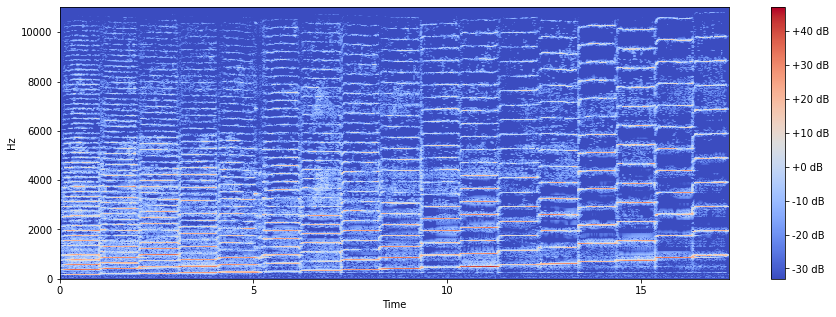

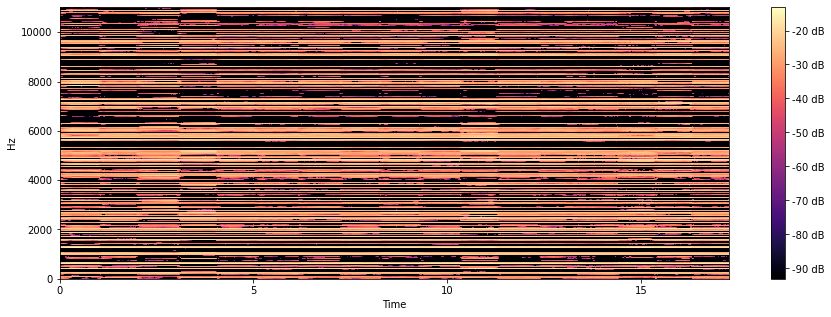

In [5]:
utils.plot_stft(data_np, sr)

initial_output = ae_model(data)
initial_output_np = initial_output.detach().numpy().transpose()
utils.plot_stft(initial_output_np, sr)

Horror sounds!

In [6]:
reconstructed_audio = utils.stft2audio(initial_output_np)
ipd.Audio(reconstructed_audio, rate=sr)

Just for fun, try it on the test data too

In [7]:
utils.test_ae_with_audio(["Brandenburg", "Canon in D"], ae_model)

playing Brandenburg...


/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Input audio:
samples:	248019
sampling rate:	22050
duration:	11.248027210884354
----------
Resulting STFT:
samples:	485
frequency is split into 1025 parts.


playing Canon in D...


/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Input audio:
samples:	501612
sampling rate:	22050
duration:	22.748843537414967
----------
Resulting STFT:
samples:	980
frequency is split into 1025 parts.


In [8]:
train_loader = torch.utils.data.DataLoader(data, batch_size=50, shuffle=True)
learning_rate = 1e-4
optimizer = optim.Adam(ae_model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

for epoch in range(300):
    loss = 0
    for inputs in train_loader:
        outputs = ae_model(inputs)
        train_loss = loss_fn(outputs, inputs)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    loss /= len(train_loader)
    print(f"Epoch:\t{epoch}\tLoss:\t{loss}")

Epoch:	0	Loss:	11.747758611043293
Epoch:	1	Loss:	11.608523241678874
Epoch:	2	Loss:	11.289818064371746
Epoch:	3	Loss:	10.847774696350097
Epoch:	4	Loss:	10.434367148081462
Epoch:	5	Loss:	10.019244766235351
Epoch:	6	Loss:	9.441495259602865
Epoch:	7	Loss:	8.820261096954345
Epoch:	8	Loss:	8.251228173573812
Epoch:	9	Loss:	7.75987860361735
Epoch:	10	Loss:	7.351328309377035
Epoch:	11	Loss:	6.889392789204916
Epoch:	12	Loss:	6.3917720476786295
Epoch:	13	Loss:	5.876432037353515
Epoch:	14	Loss:	5.401200691858928
Epoch:	15	Loss:	4.963710991541545
Epoch:	16	Loss:	4.6468987464904785
Epoch:	17	Loss:	4.393542528152466
Epoch:	18	Loss:	4.256702184677124
Epoch:	19	Loss:	4.180930757522583
Epoch:	20	Loss:	4.124253908793132
Epoch:	21	Loss:	4.1005107720692955
Epoch:	22	Loss:	4.072131172815959
Epoch:	23	Loss:	4.041150283813477
Epoch:	24	Loss:	4.035673538843791
Epoch:	25	Loss:	4.004261255264282
Epoch:	26	Loss:	3.988332494099935
Epoch:	27	Loss:	3.949173831939697
Epoch:	28	Loss:	3.9281902551651
Epoch:	29	Loss:	3.

Epoch:	235	Loss:	3.601829997698466
Epoch:	236	Loss:	3.6129613399505613
Epoch:	237	Loss:	3.61093586285909
Epoch:	238	Loss:	3.6088163534800213
Epoch:	239	Loss:	3.6065688927968345
Epoch:	240	Loss:	3.6022281726201375
Epoch:	241	Loss:	3.612135950724284
Epoch:	242	Loss:	3.616424036026001
Epoch:	243	Loss:	3.606252892812093
Epoch:	244	Loss:	3.617268212636312
Epoch:	245	Loss:	3.6059576590855915
Epoch:	246	Loss:	3.6141126712163287
Epoch:	247	Loss:	3.6021358251571653
Epoch:	248	Loss:	3.609123468399048
Epoch:	249	Loss:	3.6163519859313964
Epoch:	250	Loss:	3.6064372221628824
Epoch:	251	Loss:	3.606253210703532
Epoch:	252	Loss:	3.6241519451141357
Epoch:	253	Loss:	3.6184544563293457
Epoch:	254	Loss:	3.5992342551549275
Epoch:	255	Loss:	3.6203539848327635
Epoch:	256	Loss:	3.637984577814738
Epoch:	257	Loss:	3.595749839146932
Epoch:	258	Loss:	3.613256883621216
Epoch:	259	Loss:	3.6117764472961427
Epoch:	260	Loss:	3.6032146135965983
Epoch:	261	Loss:	3.6092318216959636
Epoch:	262	Loss:	3.607491445541382
Epoch

In [9]:
utils.test_ae_with_audio(["Brandenburg", "Canon in D"], ae_model)

playing Brandenburg...


/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Input audio:
samples:	248019
sampling rate:	22050
duration:	11.248027210884354
----------
Resulting STFT:
samples:	485
frequency is split into 1025 parts.


playing Canon in D...


/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Input audio:
samples:	501612
sampling rate:	22050
duration:	22.748843537414967
----------
Resulting STFT:
samples:	980
frequency is split into 1025 parts.


That definitely went better than I expected...